In [ ]:
def find_pairs_with_same_sum(numbers):
    pairs = []
    numbers.sort()
    
    while numbers:
        first_num = numbers.pop()
        second_num = None
        
        for num in numbers:
            if num + first_num == first_num * 2:
                second_num = num
                break
        
        if second_num is not None:
            pairs.append((first_num, second_num))
            numbers.remove(second_num)
    
    return pairs

# Example usage with a list of 1000 integers
# Replace this with your list of 1000 integers
integer_list = [4, 7, 2, 8, 10, 15, 9, 1]  # Replace with your numbers

pairs_with_same_sum = find_pairs_with_same_sum(integer_list)

# Output the pairs
for pair in pairs_with_same_sum:
    print(pair)


: 

Elapsed time of the __build_tree function: 0.01 seconds


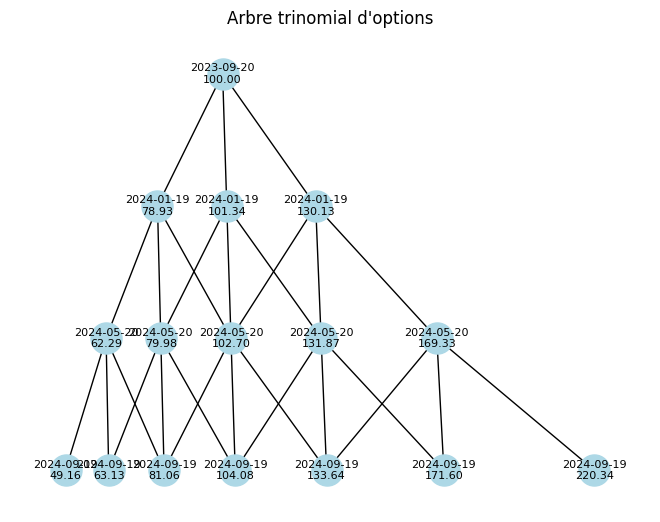

Elapsed time of the __plot_tree function: 1.15 seconds
Elapsed time of the price function: 1.16 seconds


In [1]:
from pricing_library.market import Market
from pricing_library.option import Option
from pricing_library.trinomial_tree import TrinomialTree

from datetime import datetime

t = TrinomialTree(
    market=Market(
        interest_rate=0.04,
        volatility=0.25,
        spot_price=100,
        dividend_price=0,
        dividend_ex_date=datetime(2024, 5, 24),
    ),
    pricing_date=datetime(2023, 9, 20),
    n_steps=3,
)
price = t.price(
    opt=Option(
        option_type="call",
        exercise_type="eu",
        strike_price=102,
        maturity_date=datetime(2024, 9, 19),
    ),
    draw_tree=True
)
# discount factor 


In [2]:
price

10.323756188924857

In [3]:
# params = {"n": 2000,
#           "s0": 100,
#           "vol": 0.25,
#           "rate": 0.04,
#           "strike": 102,
#           "maturity": datetime.date(year=2024, month=9, day=19),
#           "t0": datetime.date(year=2023, month=9, day=20),
#           "market": "european",
#           "div": 0
#           }
